# Lecture 8b. Multiple Linear Regression using python.

Preliminary Definitions:   
[Fit a model](https://en.wikipedia.org/wiki/Goodness_of_fit)  
[Overfitting VS Underfitting](https://en.wikipedia.org/wiki/Overfitting)  
[Bias-Variance tradeoff (underfit VS overfit)](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)   
High Bias => Underfit.  
High Variance = > Overfit


## Install necessary libraries with activated virtual env.
* Install from Windows Command Line, not from here!

* [Pingouin](https://pingouin-stats.org/) is new but funky and very helpful for beginners. Endless source of cuteness.  
Must read: [Pingouin guidelines.](https://pingouin-stats.org/guidelines.html)   

* [Statsmodels](https://www.statsmodels.org/stable/index.html) is more advanced, has more features. Has extensive [examples.](https://www.statsmodels.org/stable/examples/index.html)   

Understand what version 0.x.x means!

```
pip install statsmodels
pip install pingouin
pip install scikit-learn
pip install openpyxl
```

In [99]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pingouin as pg
import statsmodels.api as sm

In [100]:
# pandas set display output options
pd.set_option("display.precision", 3)

In [101]:
# pandas set display output options
# Uncomment line below to see the error.

#pd.set_option("precision", 3)  #  This was working fine last year, now it is not.

# I found the correct syntax using:
# pd.set_option?

## Read and prepare the data

In [102]:
# This is the path on my PC not yours!
# Learn how to set the proper path, please, please!
df = pd.read_excel("../../data/calc_grades_determinants.xlsx")
# Notice that openpyxl is a dependency that pandas requires to read excel files.
# Although we don't need to import it, we have to install it.

    ModuleNotFoundError  
    ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

    So, with the virtual environment activated:  

```
pip install openpyxl  
```

In [103]:
df.head()

,Calc HS,ACT Math,Alg Place,Alg2 Grade,HS Rank,Gender Code,Gender,Calc
0,0,27,21,3.5,68,0,F,62
1,0,29,16,4.0,99,0,F,75
2,1,30,22,4.0,98,1,M,95
3,0,34,25,3.0,90,1,M,78
4,0,29,22,4.0,99,0,F,95


In [105]:
df.columns

Index(['Calc HS', 'ACT Math', 'Alg Place', 'Alg2 Grade', 'HS Rank',
       'Gender Code', 'Gender', 'Calc'],
      dtype='object')

In [115]:
X = df[['calc_hs', 'act_math', 'alg_place', 'alg2_grade', 'hs_rank',
       'gender_code']]
X

,calc_hs,act_math,alg_place,alg2_grade,hs_rank,gender_code
0,0,27,21,3.5,68,0
1,0,29,16,4.0,99,0
2,1,30,22,4.0,98,1
3,0,34,25,3.0,90,1
4,0,29,22,4.0,99,0
...,...,...,...,...,...,...
75,0,29,22,4.0,88,1
76,0,29,17,3.0,92,0
77,1,27,26,4.0,95,0
78,0,28,26,4.0,99,0


In [106]:
# this step may be avoided, since we create X and y by numeric index
df.columns = df.columns.str.replace(" ", "_").str.lower()  # or str.replace(" ", "") # to replace blank space with nothing
df.columns

Index(['calc_hs', 'act_math', 'alg_place', 'alg2_grade', 'hs_rank',
       'gender_code', 'gender', 'calc'],
      dtype='object')

In [107]:
# get column names and data type in each column
df.dtypes

calc_hs          int64
act_math         int64
alg_place        int64
alg2_grade     float64
hs_rank          int64
gender_code      int64
gender          object
calc             int64
dtype: object

In [108]:
df.alg2_grade.unique()

array([3.5, 4. , 3. , 2.5, 2. ])

In [109]:
df.alg2_grade.unique()

array([3.5, 4. , 3. , 2.5, 2. ])

In [110]:
df.dtypes## Example of how to select some columns by HEADER name
df[["calc_hs", "act_math", "alg_place"]].head(2)

,calc_hs,act_math,alg_place
0,0,27,21
1,0,29,16


### Select the features columns X, not include gender code  and Y  
Array data strucure = indexed collection of data elements.   
This is an n-dimensional array, a matrix, conventionally denoted with capital letters.   
The feature matrix is denoted with X (usually).  
Sometimes, I prefer properly named subsets. E.g. we could call it ```all_X```

In [14]:
# exclude gender and calc
# Can you try it using column labels?
X = df.iloc[:, :-2]
X.head(3)

,calc_hs,act_math,alg_place,alg2_grade,hs_rank,gender_code
0,0,27,21,3.5,68,0
1,0,29,16,4.0,99,0
2,1,30,22,4.0,98,1


In [15]:
# 80rows, 6 cols, index NOT INCLUDED
X.shape

(80, 6)

### Select dependent variable column (aka, target, predicted, ...)  
The predicted variable is a one dimensional array (1d-vector) conventionally denoted with small letters.  
Usually it is called as y, if more than one better use explicit naming.   
Different algorithms ask for different input.   
Be very careful with the data structure:
* type
* shape
* dimensions

In [111]:
y = df["calc"]
y

0     62
1     75
2     95
3     78
4     95
      ..
75    85
76    75
77    88
78    95
79    85
Name: calc, Length: 80, dtype: int64

In [16]:
# this notation returns a pandas Series
y = df.iloc[:, -1]
y.head(3)

0    62
1    75
2    95
Name: calc, dtype: int64

In [17]:
type(y)

pandas.core.series.Series

In [18]:
y.shape

(80,)

In [18]:
np.ndim(y)

1

In [21]:
# if you prefer this output
# this notation returns a pandas dataframe
# y = df.iloc[:, -1:]
df.iloc[:, -1:].head(3)

,calc
0,62
1,75
2,95


In [22]:
type(df.iloc[:, -1:])

pandas.core.frame.DataFrame

In [23]:
# 80 rows, 1 column
df.iloc[:, -1:].shape

(80, 1)

In [24]:
# 2d array
np.ndim(df.iloc[:, -1:])

2

In [25]:
# this is the last row as a dataframe, not the last column
df_last_row = df.iloc[[-1]]
df_last_row

,calc_hs,act_math,alg_place,alg2_grade,hs_rank,gender_code,gender,calc
79,0,28,21,4.0,99,0,F,85


In [26]:
type(df_last_row)

pandas.core.frame.DataFrame

In [27]:
# this returns the last row as "pandas series type".
series_last_row = df.iloc[-1]
series_last_row

calc_hs          0
act_math        28
alg_place       21
alg2_grade     4.0
hs_rank         99
gender_code      0
gender           F
calc            85
Name: 79, dtype: object

In [28]:
type(series_last_row)

pandas.core.series.Series

### Categorical Variables Encoding

In [118]:
# create a new df for presentation reasons
df_enc = df.copy()

In [119]:
df_enc["gender_code"] = df_enc["gender_code"].astype("category")

df_enc.dtypes

calc_hs           int64
act_math          int64
alg_place         int64
alg2_grade      float64
hs_rank           int64
gender_code    category
gender           object
calc              int64
dtype: object

In [120]:
# hot encode gender. drop_first=True, not used so set columns of X one by one. 
df_enc = pd.get_dummies(df_enc, prefix=["gender"], columns=["gender"])

In [121]:
df_enc.columns

Index(['calc_hs', 'act_math', 'alg_place', 'alg2_grade', 'hs_rank',
       'gender_code', 'calc', 'gender_F', 'gender_M'],
      dtype='object')

In [39]:
df_enc.head()

,calc_hs,act_math,alg_place,alg2_grade,hs_rank,gender_code,calc,gender_F,gender_M
0,0,27,21,3.5,68,0,62,True,False
1,0,29,16,4.0,99,0,75,True,False
2,1,30,22,4.0,98,1,95,False,True
3,0,34,25,3.0,90,1,78,False,True
4,0,29,22,4.0,99,0,95,True,False


In [38]:
df_enc.gender_F.values

array([ True,  True, False, False,  True,  True, False,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True])

## Examine the various variable correlation with each other.

### Correlation table

In [122]:
df.corr?

Signature:
df.corr(
    method: 'CorrelationMethod' = 'pearson',
    min_periods: 'int' = 1,
    numeric_only: 'bool' = False,
) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.
numeric_only : bool, default False
    Include only `float`, `int` or `boolean` data.

    .. versionadded::

In [40]:
df.corr(method='pearson')

ValueError: could not convert string to float: 'F'

### Correlation plots

In [95]:
df.corr(method='pearson', numeric_only=True)

,calc_hs,act_math,alg_place,alg2_grade,hs_rank,gender_code,calc
calc_hs,1.000,0.161,0.102,-0.091,0.063,0.014,0.318
act_math,0.161,1.000,0.427,-0.019,0.443,0.126,0.353
alg_place,0.102,0.427,1.000,0.312,0.303,-0.103,0.491
alg2_grade,-0.091,-0.019,0.312,1.000,0.437,-0.446,0.259
hs_rank,0.063,0.443,0.303,0.437,1.000,-0.319,0.324
gender_code,0.014,0.126,-0.103,-0.446,-0.319,1.000,-0.021
calc,0.318,0.353,0.491,0.259,0.324,-0.021,1.000


In [123]:
type(df.corr(method='pearson', numeric_only=True))

pandas.core.frame.DataFrame

In [128]:
# set default size options, width, height
plt.rcParams['figure.figsize'] = (7, 7)

In [129]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

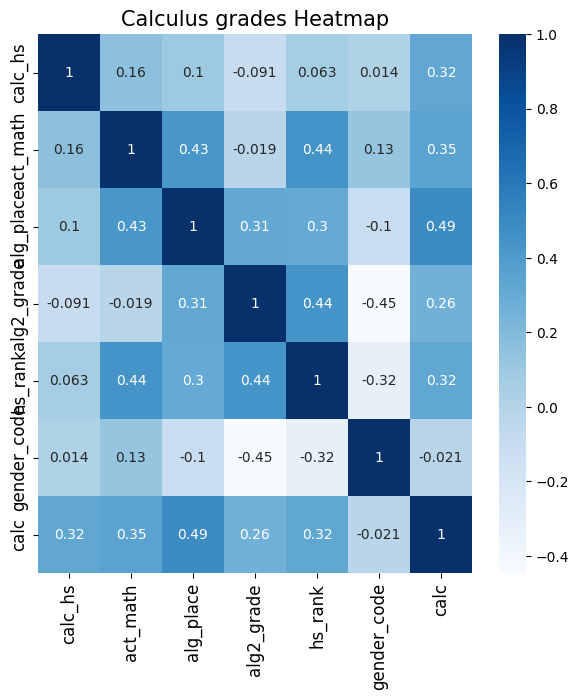

In [132]:
df_corr = df.corr(method='pearson', numeric_only=True)

sns.heatmap(
    data = df_corr,
    annot = True,
    cmap = 'Blues',
    xticklabels = df_corr.columns.values,
    yticklabels = df_corr.columns.values
);

plt.title('Calculus grades Heatmap', fontsize = 15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

In [133]:
df.loc[(df.gender_code == 1), "gender"].unique()

array(['M'], dtype=object)

In [134]:
df[["gender_code", "gender"]].values[:3]

array([[0, 'F'],
       [0, 'F'],
       [1, 'M']], dtype=object)

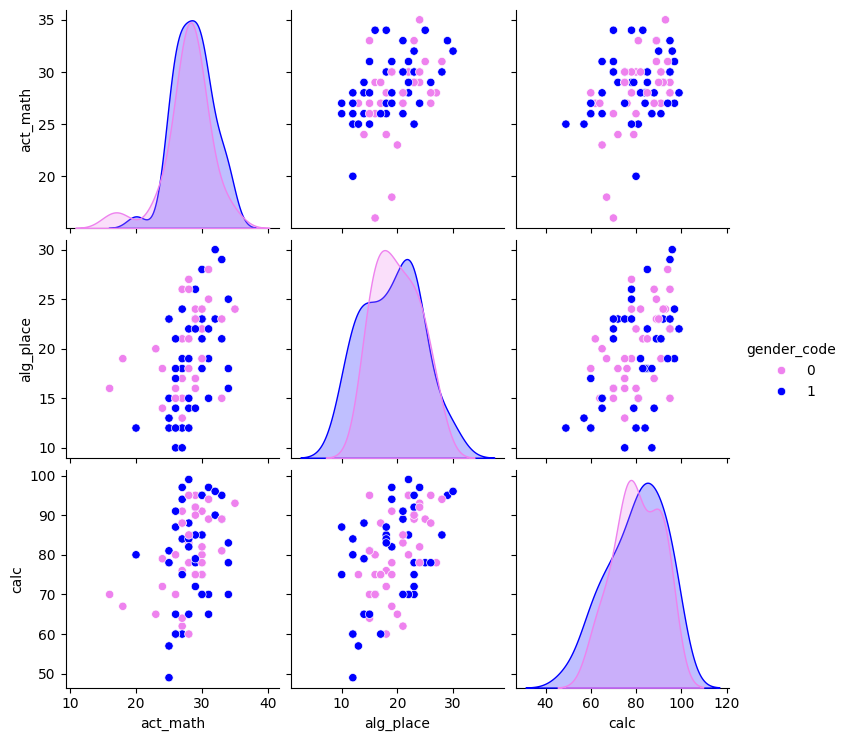

In [54]:
# pairwise correlation comparison
sns.pairplot(
    data = df[[ "act_math", "alg_place", "gender_code", "calc"]],
    hue = 'gender_code' ,
    palette = ['Violet', 'Blue']);

## Linear regression libraries

### Linear regression using pingouin

In [135]:
# y was used as a Series
# just in case we go up and down
X = df.iloc[:, :-2]
y = df.iloc[:, -1]

In [136]:
X.head()

,calc_hs,act_math,alg_place,alg2_grade,hs_rank,gender_code
0,0,27,21,3.5,68,0
1,0,29,16,4.0,99,0
2,1,30,22,4.0,98,1
3,0,34,25,3.0,90,1
4,0,29,22,4.0,99,0


In [57]:
pg.linear_regression(X, y, add_intercept=True)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,27.943,12.438,2.247,0.028,0.372,0.32,3.155,52.732
1,calc_hs,7.192,2.488,2.891,0.005,0.372,0.32,2.233,12.151
2,act_math,0.352,0.430,0.817,0.417,0.372,0.32,-0.506,1.209
3,alg_place,0.827,0.268,3.092,0.003,0.372,0.32,0.294,1.360
4,alg2_grade,3.683,2.441,1.509,0.136,0.372,0.32,-1.182,8.548
5,hs_rank,0.111,0.116,0.953,0.344,0.372,0.32,-0.121,0.342
6,gender_code,2.627,2.469,1.064,0.291,0.372,0.32,-2.294,7.548


In [137]:
lm_df = pg.linear_regression(X, y, add_intercept=True)
lm_df

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,27.943,12.438,2.247,0.028,0.372,0.32,3.155,52.732
1,calc_hs,7.192,2.488,2.891,0.005,0.372,0.32,2.233,12.151
2,act_math,0.352,0.430,0.817,0.417,0.372,0.32,-0.506,1.209
3,alg_place,0.827,0.268,3.092,0.003,0.372,0.32,0.294,1.360
4,alg2_grade,3.683,2.441,1.509,0.136,0.372,0.32,-1.182,8.548
5,hs_rank,0.111,0.116,0.953,0.344,0.372,0.32,-0.121,0.342
6,gender_code,2.627,2.469,1.064,0.291,0.372,0.32,-2.294,7.548


In [103]:
type(lm_df)

pandas.core.frame.DataFrame

In [104]:
# help(pg.linear_regression)

In [105]:
lm_df[["names", 'coef']]

,names,coef
0,Intercept,27.943
1,calc_hs,7.192
2,act_math,0.352
3,alg_place,0.827
4,alg2_grade,3.683
5,hs_rank,0.111
6,gender_code,2.627


In [176]:
lm_df.ancova?

Signature:      lm_df.ancova(dv=None, between=None, covar=None, effsize='np2')
Type:           AccessorMethod
String form:    <pandas_flavor.register.register_dataframe_method.<locals>.inner.<locals>.AccessorMethod object at 0x7fca3092d8d0>
File:           ~/venv_projects/uoa_py_course/course_venv/lib/python3.11/site-packages/pandas_flavor/register.py
Docstring:      DataFrame Accessor method class.
Init docstring:
Initialize the accessor method class.

Args:
    pandas_obj (pandas.DataFrame): The pandas DataFrame object.
Call docstring:
ANCOVA with one or more covariate(s).

Parameters
----------
data : :py:class:`pandas.DataFrame`
    DataFrame. Note that this function can also directly be used as a
    Pandas method, in which case this argument is no longer needed.
dv : string
    Name of column in data with the dependent variable.
between : string
    Name of column in data with the between factor.
covar : string or list
    Name(s) of column(s) in data with the covariate.
effsize 

In [106]:
lm_df.residuals_

array([-13.21286866,  -2.05046265,   2.9269346 ,  -6.20016977,
        12.98727004,   4.1457711 , -11.25509849,  19.57044916,
        11.87627504,  16.01829256, -20.28970098,  -8.26652483,
         1.90781605,  -0.07419223,   4.02429657,  19.01287875,
        -0.94641306,   0.02875115,  -7.40458965,   7.4982304 ,
         3.7827158 ,  11.93140625,   2.71877132,  10.99633818,
       -11.76215125,   1.41035292,   8.63249374,   0.65085924,
       -10.96745199,   5.99467594,   7.22412468,   5.49832403,
         4.68457735,  -4.62185161,  17.11207371, -15.81839726,
        -9.33536255, -16.58361086,  -8.15713117,  -2.01832844,
       -11.85836931, -14.78361596,  16.78587242,  -4.94771103,
       -12.91781619,  -7.79644334, -10.95777985,   2.4045891 ,
         4.55529   ,  -4.72582593,   3.8103524 ,  11.1071759 ,
         8.29349018,  -0.17019173,   4.86477745,  -9.71250256,
         0.11493625,   1.27920122,   9.62396062,  -8.93300671,
        -4.29931944,   1.36205772,  15.31455523,  -5.76

In [107]:
pd.Series(lm_df.residuals_).describe().round(2)

count    80.00
mean      0.00
std       9.07
min     -20.29
25%      -6.50
50%       0.53
75%       5.62
max      19.57
dtype: float64

In [139]:
# regression get output not as df
X = df.iloc[:, :-2]
y = df.iloc[:, -1]

lm_not_df = pg.linear_regression(X, y, add_intercept=True, as_dataframe=False)
# lm_not_df

In [140]:
lm_not_df['pred']

array([75.21286866, 77.05046265, 92.0730654 , 84.20016977, 82.01272996,
       86.8542289 , 83.25509849, 75.42955084, 76.12372496, 80.98170744,
       69.28970098, 78.26652483, 73.09218395, 78.07419223, 84.97570343,
       67.98712125, 79.94641306, 84.97124885, 64.40458965, 73.5017696 ,
       72.2172842 , 76.06859375, 80.28122868, 86.00366182, 71.76215125,
       82.58964708, 78.36750626, 94.34914076, 74.96745199, 74.00532406,
       85.77587532, 85.50167597, 91.31542265, 89.62185161, 76.88792629,
       85.81839726, 89.33536255, 76.58361086, 73.15713117, 84.01832844,
       76.85836931, 79.78361596, 67.21412758, 74.94771103, 77.91781619,
       85.79644334, 80.95777985, 79.5954109 , 84.44471   , 76.72582593,
       86.1896476 , 68.8928241 , 90.70650982, 83.17019173, 84.13522255,
       84.71250256, 91.88506375, 68.72079878, 85.37603938, 78.93300671,
       64.29931944, 90.63794228, 75.68544477, 80.76223423, 71.27137186,
       84.06085038, 92.58643587, 70.24610914, 81.38964646, 82.61

In [141]:
pd.Series(lm_not_df["residuals"]).describe().round(2)

count    80.00
mean      0.00
std       9.07
min     -20.29
25%      -6.50
50%       0.53
75%       5.62
max      19.57
dtype: float64

In [142]:
# # If y is input as a dataframe data type
# # AssertionError: y must be one-dimensional.

# y = df.iloc[:, -1:]

# pg.linear_regression(X, y, add_intercept=True)

In [143]:
# # regression using encoded column for gender
# lm_enc = pg.linear_regression(
#     df_enc[['calc_hs', 'act_math', 'alg_place', 'alg2_grade', 'hs_rank', 'gender_M']],
#     y, add_intercept=True)
# lm_enc

### Linear regression using statsmodels

In [144]:
# add a constant intercept differently
X = df.iloc[:, :-2]
y = df.iloc[:, -1]

In [145]:
X.head()

,calc_hs,act_math,alg_place,alg2_grade,hs_rank,gender_code
0,0,27,21,3.5,68,0
1,0,29,16,4.0,99,0
2,1,30,22,4.0,98,1
3,0,34,25,3.0,90,1
4,0,29,22,4.0,99,0


In [146]:
X = sm.add_constant(X)
X.head(2)

,const,calc_hs,act_math,alg_place,alg2_grade,hs_rank,gender_code
0,1.0,0,27,21,3.5,68,0
1,1.0,0,29,16,4.0,99,0


In [147]:
ols_results = sm.OLS(y, X).fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   calc   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     7.197
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           4.70e-06
Time:                        20:08:43   Log-Likelihood:                -289.37
No. Observations:                  80   AIC:                             592.7
Df Residuals:                      73   BIC:                             609.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          27.9434     12.438      2.247      

In [148]:
type(ols_results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [149]:
print(ols_results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.320   
Dependent Variable: calc             AIC:                592.7346
Date:               2024-04-11 20:08 BIC:                609.4087
No. Observations:   80               Log-Likelihood:     -289.37 
Df Model:           6                F-statistic:        7.197   
Df Residuals:       73               Prob (F-statistic): 4.70e-06
R-squared:          0.372            Scale:              88.932  
------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          27.9434   12.4378  2.2466  0.0277   3.1549  52.7320
calc_hs         7.1923    2.4882  2.8906  0.0051   2.2333  12.1513
act_math        0.3515    0.4304  0.8168  0.4167  -0.5062   1.2092
alg_place       0.8270    0.2675  3.0915  0.0028   0.2939   1.3602
alg2_grade      3.68

In [150]:
# different output representation
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   calc   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     7.197
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           4.70e-06
Time:                        20:08:45   Log-Likelihood:                -289.37
No. Observations:                  80   AIC:                             592.7
Df Residuals:                      73   BIC:                             609.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          27.9434     12.438      2.247      0.028       3.155      52.732
calc_hs         7.1923      2.488      2.891      0.005       2.233      12.151
act_math        0.3515      0.430      0.817      0.417      -0.506       1.209
alg_place       0.8270      0.268      3.092      0.003       0.294       1.360
alg2_grade      3.6830      2.441      1.509      0.136      -1.182       8.548
hs_rank         0.1106      0.116      0.953      0.344      -0.121       0.342
gender_code     2.6271      2.469      1.064      0.291      -2.294       7.548
==============================================================================
Omnibus:                        1.372   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.155
Skew:                           0.087   Prob(JB):                        0.561
Kurtosis:                       2.437   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
ols_results.diagn

{'jb': 1.1552537336407829,
 'jbpv': 0.5612286578111305,
 'skew': 0.08652548845623431,
 'kurtosis': 2.4373016087797343,
 'omni': 1.3719992805348942,
 'omnipv': 0.5035865724628221,
 'condno': 1129.742875813099,
 'mineigval': 0.5655505492075009}

In [ ]:
ols_results.

In [121]:
ols_results.aic

592.7345529039097

In [69]:
ols_results.tvalues

const          2.247
calc_hs        2.891
act_math       0.817
alg_place      3.092
alg2_grade     1.509
hs_rank        0.953
gender_code    1.064
dtype: float64

In [70]:
# dir(ols_results)

In [71]:
ols_results.pvalues

const          0.028
calc_hs        0.005
act_math       0.417
alg_place      0.003
alg2_grade     0.136
hs_rank        0.344
gender_code    0.291
dtype: float64

In [72]:
ols_results.resid

0    -13.213
1     -2.050
2      2.927
3     -6.200
4     12.987
       ...  
75     1.577
76     1.580
77    -3.368
78    10.031
79     4.166
Length: 80, dtype: float64

In [73]:
pd.Series(ols_results.resid).describe().round(2)

count    80.00
mean      0.00
std       9.07
min     -20.29
25%      -6.50
50%       0.53
75%       5.62
max      19.57
dtype: float64

In [74]:
# sum of squared residuals or RSS residual sum of squares
ols_results.ssr

6492.036036730608

In [152]:
compare_pred_df = pd.DataFrame({'actual_y': y, 'y_hat':ols_results.fittedvalues})
compare_pred_df.head(10)

,actual_y,y_hat
0,62,75.213
1,75,77.050
2,95,92.073
3,78,84.200
4,95,82.013
5,91,86.854
6,72,83.255
7,95,75.430
8,88,76.124
9,97,80.982


### Linear Regression Plots

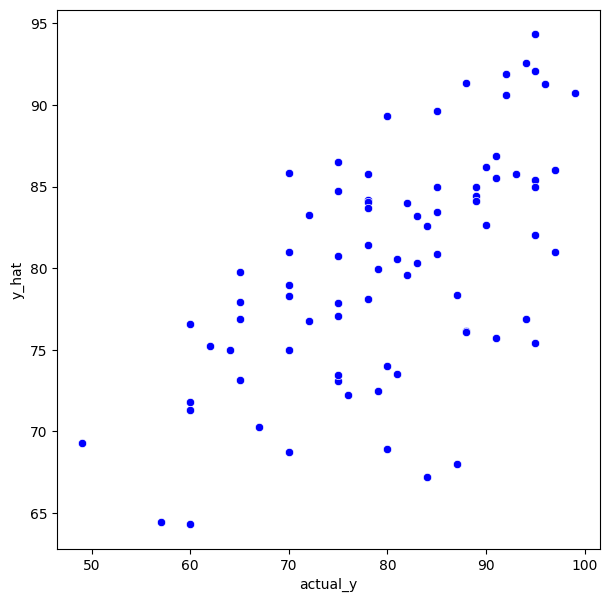

In [153]:
sns.scatterplot(x="actual_y", y="y_hat", color="b", data=compare_pred_df);

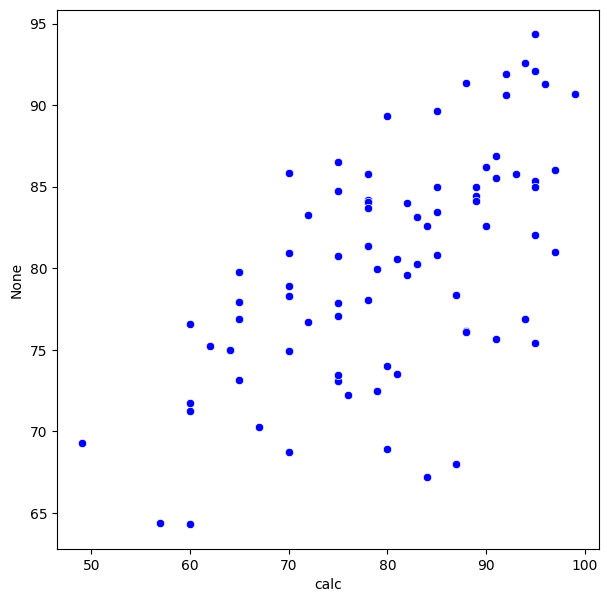

In [154]:
# takes arrays as arguments
sns.scatterplot(x=y, y=ols_results.fittedvalues, color="b");

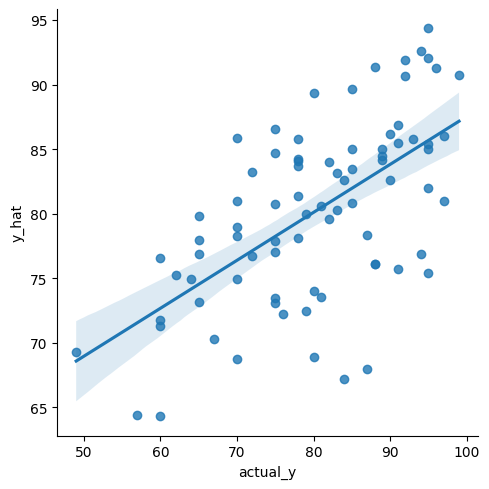

In [155]:
g = sns.lmplot(x="actual_y", y="y_hat", data=compare_pred_df)

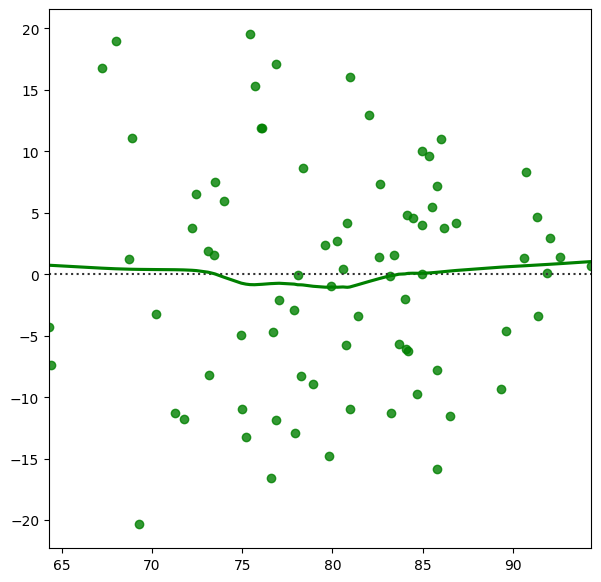

In [156]:
sns.residplot(x=ols_results.fittedvalues, y=ols_results.resid, lowess=True, color="g");

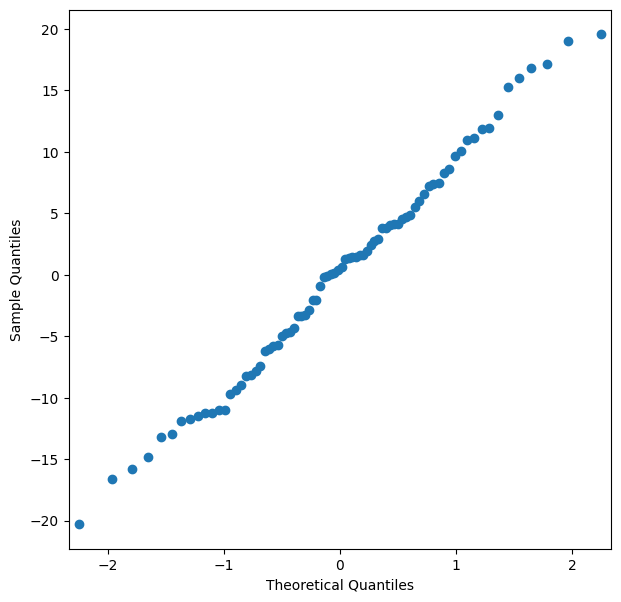

In [157]:
sm.qqplot(ols_results.resid);
# plt.show()

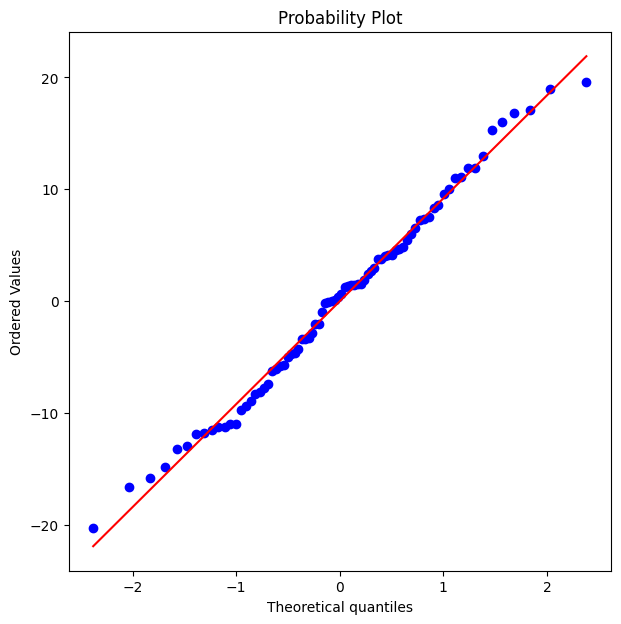

In [158]:
from scipy import stats

stats.probplot(ols_results.resid, plot=sns.mpl.pyplot);

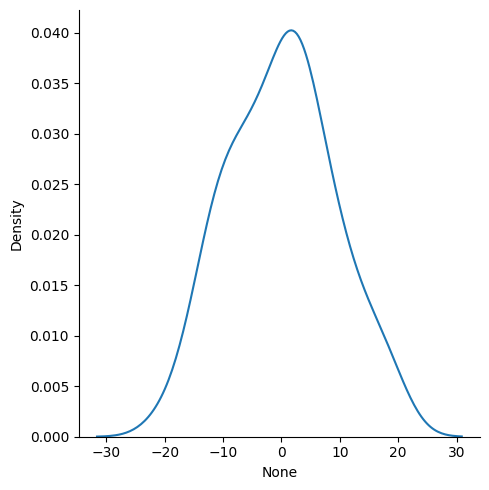

In [159]:
sns.displot(x=ols_results.resid, kind="kde");

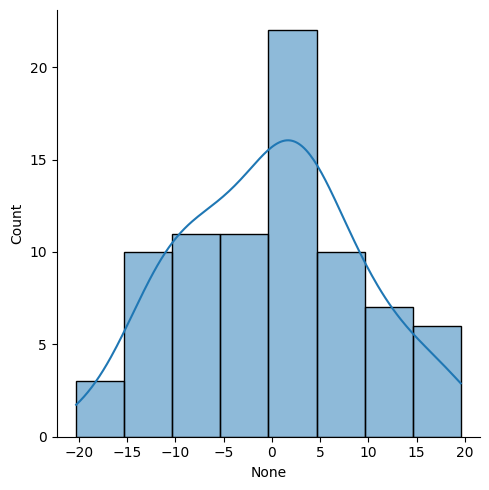

In [160]:
sns.displot(x=ols_results.resid, kde=True);

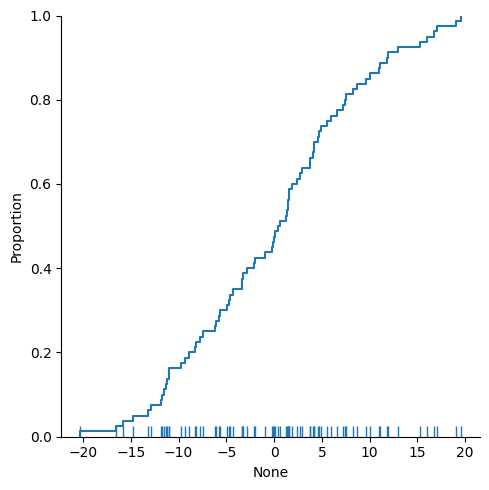

In [161]:
sns.displot(x=ols_results.resid, kind="ecdf", rug=True);

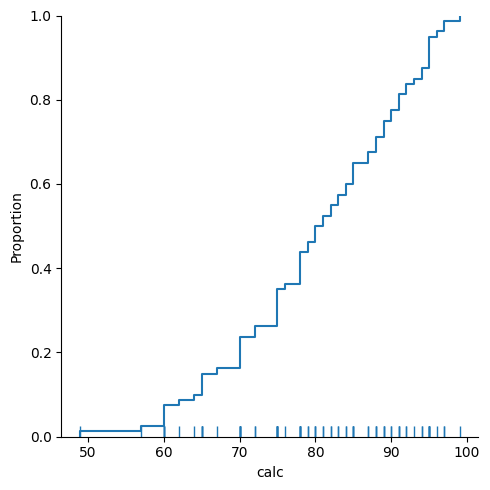

In [162]:
sns.displot(x=y, kind="ecdf",  rug=True);

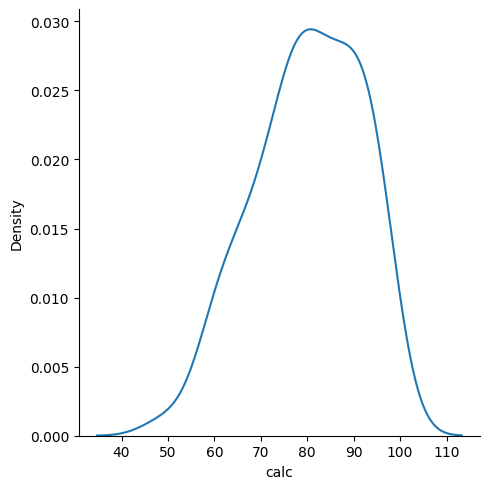

In [163]:
sns.displot(x=y, kind="kde");

In [164]:
# # documentation on the function
# help(sm.OLS)

In [165]:
# # documentation on the output
# help(ols_results)

### Remove non statistically significant factors

In [166]:
# four features, mind the F-statistic
X = df[["calc_hs", "act_math", "alg2_grade", "alg_place"]]
X = sm.add_constant(X)

ols_results = sm.OLS(y, X).fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   calc   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     10.44
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           8.91e-07
Time:                        20:10:46   Log-Likelihood:                -290.25
No. Observations:                  80   AIC:                             590.5
Df Residuals:                      75   BIC:                             602.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.1694     11.841      2.717      0.008       8.580      55.759
calc_hs        7.1631      2.478      2.891      0.005       2.227      12.099
act_math       0.5980      0.369      1.622      0.109      -0.136       1.332
alg2_grade     3.7553      2.046      1.836      0.070      -0.320       7.830
alg_place      0.8098      0.266      3.039      0.003       0.279       1.341
==============================================================================
Omnibus:                        1.058   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                1.075
Skew:                           0.159   Prob(JB):                        0.584
Kurtosis:                       2.529   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Best model I managed  to find   

* three features  
* F-statistic
* p-values 

In [167]:
# three features, mind the F-statistic, the 

X = df[["calc_hs", "act_math", "alg2_grade"]]
X = sm.add_constant(X)

ols_results = sm.OLS(y, X).fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   calc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     9.781
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.57e-05
Time:                        20:10:53   Log-Likelihood:                -294.89
No. Observations:                  80   AIC:                             597.8
Df Residuals:                      76   BIC:                             607.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6355     12.259      2.091      0.040       1.219      50.052
calc_hs        7.7175      2.601      2.967      0.004       2.537      12.898
act_math       1.0955      0.348      3.151      0.002       0.403       1.788
alg2_grade     5.9895      2.010      2.980      0.004       1.987       9.992
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.949
Skew:                          -0.031   Prob(JB):                        0.622
Kurtosis:                       2.470   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
X = df[["calc_hs", "act_math", "alg2_grade"]]
lm = pg.linear_regression(X, y, add_intercept=True)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,25.635,12.259,2.091,0.040,0.279,0.25,1.219,50.052
1,calc_hs,7.718,2.601,2.967,0.004,0.279,0.25,2.537,12.898
2,act_math,1.096,0.348,3.151,0.002,0.279,0.25,0.403,1.788
3,alg2_grade,5.990,2.010,2.980,0.004,0.279,0.25,1.987,9.992


In [169]:
# three features, mind the F-statistic
# the p-value of act_math is not ok
X = df[["calc_hs", "act_math", "alg_place"]]
X = sm.add_constant(X)

ols_results = sm.OLS(y, X).fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   calc   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     12.41
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.09e-06
Time:                        20:10:54   Log-Likelihood:                -292.01
No. Observations:                  80   AIC:                             592.0
Df Residuals:                      76   BIC:                             601.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5705      9.468      4.813      0.000      26.714      64.427
calc_hs        6.6644      2.501      2.665      0.009       1.684      11.645
act_math       0.4874      0.369      1.320      0.191      -0.248       1.223
alg_place      0.9855      0.252      3.903      0.000       0.483       1.488
==============================================================================
Omnibus:                        1.406   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                1.129
Skew:                           0.022   Prob(JB):                        0.569
Kurtosis:                       2.420   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
# tho features, mind the F-statistic
X = df[["calc_hs", "alg_place"]]
X = sm.add_constant(X)

ols_results = sm.OLS(y, X).fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   calc   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     17.57
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           5.16e-07
Time:                        20:10:55   Log-Likelihood:                -292.91
No. Observations:                  80   AIC:                             591.8
Df Residuals:                      77   BIC:                             599.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.5221      4.583     12.333      0.000      47.396      65.648
calc_hs        7.0958      2.491      2.848      0.006       2.135      12.056
alg_place      1.1250      0.230      4.883      0.000       0.666       1.584
==============================================================================
Omnibus:                        1.163   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.019
Skew:                           0.042   Prob(JB):                        0.601
Kurtosis:                       2.454   Cond. No.                         85.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
# tho features, mind the F-statistic
X = df[["calc_hs", "alg2_grade"]]
X = sm.add_constant(X)

ols_results = sm.OLS(y, X).fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   calc   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     8.699
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           0.000392
Time:                        20:10:55   Log-Likelihood:                -299.81
No. Observations:                  80   AIC:                             605.6
Df Residuals:                      77   BIC:                             612.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.3616      7.849      7.181      0.000      40.733      71.990
calc_hs        9.0287      2.713      3.328      0.001       3.627      14.430
alg2_grade     5.9602      2.123      2.807      0.006       1.733      10.188
==============================================================================
Omnibus:                        3.323   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                1.963
Skew:                          -0.119   Prob(JB):                        0.375
Kurtosis:                       2.271   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
# tho features, mind the F-statistic
X = df[["calc_hs", "act_math"]]
X = sm.add_constant(X)

ols_results = sm.OLS(y, X).fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   calc   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     9.281
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           0.000245
Time:                        20:10:56   Log-Likelihood:                -299.32
No. Observations:                  80   AIC:                             604.6
Df Residuals:                      77   BIC:                             611.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.5814     10.291      4.624      0.000      27.090      68.073
calc_hs        7.0245      2.720      2.582      0.012       1.608      12.441
act_math       1.0907      0.365      2.988      0.004       0.364       1.818
==============================================================================
Omnibus:                        3.288   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                2.820
Skew:                          -0.356   Prob(JB):                        0.244
Kurtosis:                       2.418   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""